In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

#### - Understanding dirichlet distribution

In [2]:
# alpha = Parameter of the distribution (k dimension for sample of dimension k). 
# <https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.dirichlet.html>

np.random.dirichlet((2, 1, 1), (4,2))

array([[[0.92025129, 0.00198465, 0.07776407],
        [0.82798056, 0.11767029, 0.05434915]],

       [[0.21271415, 0.76805089, 0.01923496],
        [0.60632136, 0.36828501, 0.02539363]],

       [[0.8255588 , 0.08311764, 0.09132356],
        [0.53463256, 0.20950244, 0.255865  ]],

       [[0.79920275, 0.0240252 , 0.17677204],
        [0.49513816, 0.0636923 , 0.44116954]]])

In [3]:
size = 10
d1 = np.random.dirichlet((1, 1, 1), size)
d1

array([[0.28726229, 0.11656589, 0.59617181],
       [0.23486929, 0.72642482, 0.03870588],
       [0.29663924, 0.36892685, 0.33443391],
       [0.33148938, 0.42505419, 0.24345643],
       [0.1883356 , 0.09906746, 0.71259695],
       [0.30534368, 0.55123811, 0.1434182 ],
       [0.17932747, 0.1180816 , 0.70259093],
       [0.1352453 , 0.48447475, 0.38027994],
       [0.43323702, 0.37794508, 0.1888179 ],
       [0.36881868, 0.36481531, 0.26636601]])

Text(0.5, 1.0, 'Dirichlet distribution')

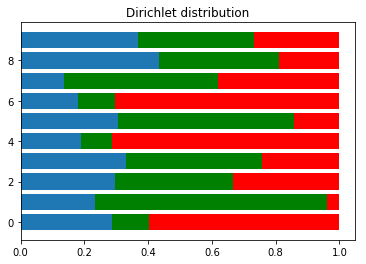

In [4]:
d1_t = d1.transpose()

plt.barh(range(size), d1_t[0])
plt.barh(range(size), d1_t[1], left=d1_t[0], color='g')
plt.barh(range(size), d1_t[2], left=d1_t[0]+d1_t[1], color='r')
plt.title("Dirichlet distribution")

In [5]:
d2 = np.random.dirichlet((99, 1, 1), size)
d2

array([[9.91985793e-01, 1.01634747e-03, 6.99785977e-03],
       [9.87292191e-01, 6.45554891e-03, 6.25226045e-03],
       [9.80121813e-01, 3.61004958e-03, 1.62681376e-02],
       [9.84267427e-01, 1.37288696e-03, 1.43596863e-02],
       [9.84028573e-01, 1.17984363e-02, 4.17299027e-03],
       [9.88716845e-01, 9.61981189e-05, 1.11869565e-02],
       [9.70884029e-01, 2.36702687e-02, 5.44570205e-03],
       [9.41216082e-01, 5.62096737e-02, 2.57424440e-03],
       [9.77253317e-01, 3.58052909e-03, 1.91661540e-02],
       [9.84992507e-01, 1.09140277e-02, 4.09346524e-03]])

Text(0.5, 1.0, 'Dirichlet Distribution')

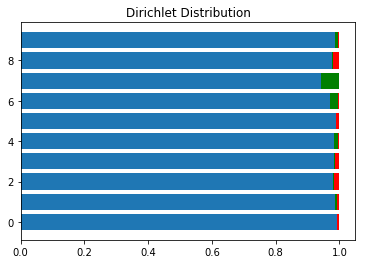

In [6]:
d2_t = d2.transpose()

plt.barh(range(size), d2_t[0])
plt.barh(range(size), d2_t[1], left=d2_t[0], color='g')
plt.barh(range(size), d2_t[2], left=d2_t[0]+d2_t[1], color='r')
plt.title("Dirichlet Distribution")

#### - Check variance, mean, median

In [7]:
def calculate_median(df):
    median = []
    x=0
    
    for i in df:
        median.append(df[x].median())
        x = x+1
        
    return median

In [8]:
df1 = pd.DataFrame(data = d1.T)

In [9]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
std,0.243099,0.354275,0.036156,0.090813,0.331471,0.205346,0.321249,0.179285,0.128171,0.058030
min,0.116566,0.038706,0.296639,0.243456,0.099067,0.143418,0.118082,0.135245,0.188818,0.266366
25%,0.201914,0.136788,0.315537,0.287473,0.143702,0.224381,0.148705,0.257763,0.283381,0.315591
50%,0.287262,0.234869,0.334434,0.331489,0.188336,0.305344,0.179327,0.380280,0.377945,0.364815
75%,0.441717,0.480647,0.351680,0.378272,0.450466,0.428291,0.440959,0.432377,0.405591,0.366817
max,0.596172,0.726425,0.368927,0.425054,0.712597,0.551238,0.702591,0.484475,0.433237,0.368819


In [10]:
calculate_median(df1)

[0.28726229487300636,
 0.23486929365082457,
 0.3344339074898667,
 0.3314893794577883,
 0.18833559644583314,
 0.30534368370823645,
 0.17932747272772748,
 0.38027994262138787,
 0.37794507854161374,
 0.36481531187359745]

In [116]:
df1

,0,1,2,3,4,5,6,7,8,9
0,0.737828,0.401437,0.183208,0.093974,0.032222,0.191981,0.125804,0.314772,0.216035,0.282998
1,0.245231,0.219703,0.699913,0.378438,0.805390,0.060612,0.610757,0.480711,0.248582,0.263136
2,0.016941,0.378860,0.116879,0.527589,0.162387,0.747407,0.263439,0.204517,0.535383,0.453867


In [11]:
df2 = pd.DataFrame(data = d2.T)
df2.describe()

,0,1,2,3,4,5,6,7,8,9
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
std,0.570418,0.566345,0.560171,0.563763,0.563532,0.567606,0.552210,0.527125,0.557706,0.564364
min,0.001016,0.006252,0.003610,0.001373,0.004173,0.000096,0.005446,0.002574,0.003581,0.004093
25%,0.004007,0.006354,0.009939,0.007866,0.007986,0.005642,0.014558,0.029392,0.011373,0.007504
50%,0.006998,0.006456,0.016268,0.014360,0.011798,0.011187,0.023670,0.056210,0.019166,0.010914
75%,0.499492,0.496874,0.498195,0.499314,0.497914,0.499952,0.497277,0.498713,0.498210,0.497953
max,0.991986,0.987292,0.980122,0.984267,0.984029,0.988717,0.970884,0.941216,0.977253,0.984993


In [12]:
calculate_median(df2)

[0.0069978597693386435,
 0.006455548912580374,
 0.01626813762101715,
 0.01435968631484885,
 0.011798436261414441,
 0.011186956489742049,
 0.023670268661752054,
 0.05620967369284547,
 0.019166153982366763,
 0.010914027673129746]

In [13]:
df2

,0,1,2,3,4,5,6,7,8,9
0,0.991986,0.987292,0.980122,0.984267,0.984029,0.988717,0.970884,0.941216,0.977253,0.984993
1,0.001016,0.006456,0.003610,0.001373,0.011798,0.000096,0.023670,0.056210,0.003581,0.010914
2,0.006998,0.006252,0.016268,0.014360,0.004173,0.011187,0.005446,0.002574,0.019166,0.004093


#### - Simulate cases in participative platform

In [20]:
categories = 4
comments = 100
alpha = 0.520
s = np.random.dirichlet((2 * alpha, alpha), (categories, comments))
c1, c2, c3, c4 = s[:, :, 0]

In [38]:
print('percentage to like and dislike: ', s[0][0])
print('sum of percentages: ', s[0][0].sum())
print('how many categories and comments was voted: ', s.shape)

percentage to like and dislike:  [0.86929378 0.13070622]
sum of percentages:  1.0
how many categories and comments was voted:  (4, 100, 2)


In [44]:
votes1 = np.random.random(size=(100, comments)) < c1
votes2 = np.random.random(size=(70, comments)) < c2
votes3 = np.random.random(size=(120, comments)) < c3
votes4 = np.random.random(size=(90, comments)) < c4

In [150]:
# Like and dislike
votes1[1,:5]

array([ True,  True, False, False,  True])

In [56]:
votes = np.vstack([votes1,votes2,votes3,votes4])

In [58]:
votes.shape

(380, 100)

In [93]:
pca = PCA(n_components=2).fit_transform(votes)

In [94]:
pca.shape

(380, 2)

In [95]:
pca[0].sum()

-2.5947395954440537

In [96]:
pca[:5]

array([[-1.90124391, -0.69349569],
       [-1.24249612, -1.41615698],
       [-1.64187586, -0.56240698],
       [-1.17007354, -0.84986151],
       [-0.75384599, -1.15697487]])

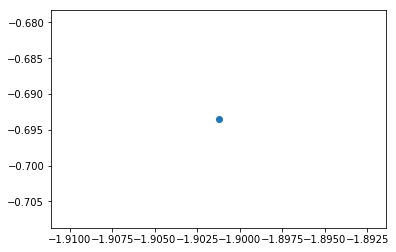

In [105]:
plt.scatter(pca[0][0],pca[0][1])
plt.show()

In [128]:
df = pd.DataFrame(pca)

In [133]:
df.head(3)

,0,1
0,-1.901244,-0.693496
1,-1.242496,-1.416157
2,-1.641876,-0.562407


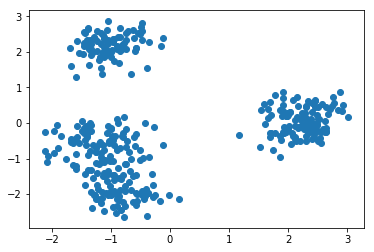

In [145]:
# plt.scatter(*pca.T)
plt.scatter(x=df[0], y=df[1]) 